# Heart Rate vs Time Figure

#### Analysis by Jeremy Mann

Just a simple time vs heart rate plot. 

It seems like when the sensor loses contact with the heartbeat it registers it as zero. I should have seen this during my wrangle. Guess no one is perfect? 

I need to modify the wrangler to set zero values (or many less than 30?) to NANs.



In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

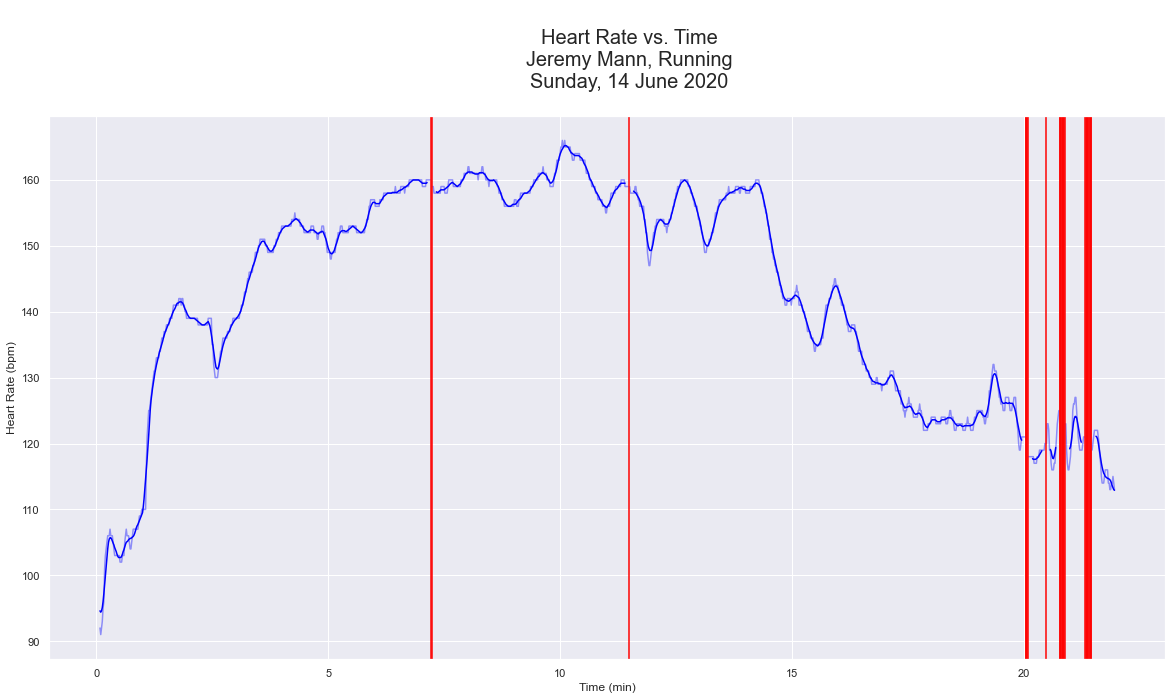

In [18]:
class hr_vs_time_figure:
    '''
    Makes a heart rate vs time plot
    '''
    def __init__(self, data_filename,):
        self.data_filename = data_filename
        self.data_filepath = os.path.join('..', 'data', 'wrangled_data', data_filename)
        self.df = self.load_data()
        self.fig = self.create_figure()
        
    def load_data(self):
        df = pd.read_csv(self.data_filepath)

        df[df['HR (bpm)'] == 0] = np.NAN
        
        df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

        return df
    
    def create_figure(self, figsize = (20, 10), title_size = 20, window_radius = 5):
        
        fig = plt.figure( figsize = figsize)
        
        t = self.create_time_axis()[window_radius:-window_radius]
        
        mins, avgs, maxes, stds = self.get_min_avg_max_hr(window_radius)
        
        plt.plot(t, avgs, color = 'blue')
        plt.plot(t, self.create_hr_axis()[window_radius:-window_radius], 
                 color = 'blue', alpha = .4)
        
        self.plot_missing_values()
        
        plt.xlabel('Time (min)')
        plt.ylabel('Heart Rate (bpm)')
        plt.title(self.make_title(), fontsize = title_size)
        
        return fig
    
    def plot_missing_values(self):
        null_mask = fig.df["HR (bpm)"].isnull()
        null_times = fig.df['HR (bpm)'][null_mask].index
        for t_null in null_times:
            plt.axvline(t_null/60, color = 'red')
    
    def create_time_axis(self):
        start_datetime = self.df.loc[0, 'Time']
        time_deltas = self.df['Time'] - self.df.loc[0, 'Time']
        time_seconds = time_deltas.dt.seconds.values/60
        
        return time_seconds
    
    def create_hr_axis(self):
        hr = self.df['HR (bpm)'].values
        return hr
    
    def get_min_avg_max_hr(self, window_radius):
        
        hr = self.create_hr_axis()
        
        windows_list = [hr[i-window_radius:i + window_radius] for i in range(window_radius, hr.shape[0] - window_radius)]
        windows = np.vstack(windows_list)
        
        mins = windows.min(axis = 1)
        avgs = windows.mean(axis = 1)
        stds = windows.std(axis = 1)
        maxes = windows.max(axis = 1)
        
        return mins, avgs, maxes, stds
        
    def make_title(self):
        filename_terms = self.data_filename.replace('.', '_').split('_')
        activity = filename_terms[2].title()
        name = '{} {}'.format(filename_terms[-3], filename_terms[-2]).title()
        
        datetime_format  = '%Y-%m-%d %H:%M:%S'
        start_datetime = self.df.loc[0, 'Time']
        start_time = start_datetime.strftime('%H:%M')
        last_entry = self.df.shape[0]-1
        end_datetime = self.df.loc[last_entry, 'Time']
        end_time = end_datetime.strftime('%H:%M')
        
        date = start_datetime.strftime('%A, %d %B %Y')
        
        title = '''
        Heart Rate vs. Time
        {}, {}
        {}
        '''.format( name, activity, date)
        return title


data_filepath = '2020-06-14_15:25_running_jeremy_mann.csv'
fig = hr_vs_time_figure(data_filepath)